In [1]:
# https://github.com/voila-gallery/voila-spotify/blob/master/Spotify_viewer.ipynb

import pandas as pd
import os, json, datetime
import matplotlib.pyplot as plt
import spotify_fcns as sfy
from calendar import monthrange

# not as fun right now as all data is from the same month
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# for multiple files from different downloads, find way to join then

In [2]:
sp_df = pd.read_json(os.path.join('MyData', 'StreamingHistory0.json'))
sp_df

,endTime,artistName,trackName,msPlayed
0,2021-01-01 20:02,OneRepublic,Better,204386
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000
3,2021-01-01 20:13,Stromae,ave cesaria,249520
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666
...,...,...,...,...
1204,2021-02-09 18:20,Jon Bellion,All Time Low,217603
1205,2021-02-09 18:24,AJR,My Calling,236400
1206,2021-02-09 20:10,Bastille,Good Lesson,210933
1207,2021-02-09 20:13,American Authors,I Wanna Go Out,186000


In [3]:
artist_counts = sp_df['artistName'].value_counts()
artist_counts[ artist_counts > 20 ]

Justin Timberlake      171
OneRepublic            115
Bastille                74
Taylor Swift            63
Shawn Mendes            56
Jon Bellion             47
Imagine Dragons         46
Panic! At The Disco     43
Train                   29
Twenty One Pilots       25
Charlie Puth            24
Zedd                    22
Name: artistName, dtype: int64

In [4]:
track_counts = sp_df['trackName'].value_counts()
track_counts[ track_counts > 10 ]

Mirrors                                       46
Teach Me How To Love                          29
Drive By                                      27
All Time Low - Acoustic                       26
I Know Places                                 24
LoveStoned / I Think She Knows (Interlude)    20
All Time Low                                  20
slow motion                                   18
My Love (feat. T.I.)                          16
Fire                                          15
Beautiful Now                                 15
I've Gotta Be Me                              15
FRIENDS                                       14
Gone, Gone, Gone                              14
More Than You Know                            14
Good Life                                     14
Say Something (feat. Chris Stapleton)         13
Nothin' Else                                  13
Unknown Track                                 12
Chasing The Sun                               12
Te Quiero           

In [5]:
sp_df[ sp_df['artistName'] == 'OneRepublic' ]['msPlayed'].sum() / 1000 / 60 # minutes

406.1956

In [6]:
# minutes played
(sp_df.groupby(['artistName'])['msPlayed'].sum() / 1000 / 60).sort_values(ascending=False)[:15]

artistName
Justin Timberlake      986.205317
OneRepublic            406.195600
Bastille               245.144817
Taylor Swift           213.585050
Shawn Mendes           175.251733
Jon Bellion            165.307850
Imagine Dragons        162.599167
Panic! At The Disco    126.572917
Twenty One Pilots       89.237950
Train                   86.438217
Charlie Puth            80.348933
Zedd                    75.933667
Avicii                  73.708867
Beyoncé                 64.533517
Ed Sheeran              64.315383
Name: msPlayed, dtype: float64

In [7]:
sp_df[ sp_df['artistName'] == 'Justin Timberlake' ]['trackName'].value_counts()

Mirrors                                                                         46
LoveStoned / I Think She Knows (Interlude)                                      20
My Love (feat. T.I.)                                                            16
Nothin' Else                                                                    13
Say Something (feat. Chris Stapleton)                                           13
Rock Your Body                                                                  11
Cry Me a River                                                                   8
Until the End of Time                                                            8
Chop Me Up (feat. Timbaland & Three-6 Mafia)                                     5
SexyBack (feat. Timbaland)                                                       5
Medley: Let Me Talk to You / My Love (feat. T.I.)                                4
What Goes Around.../...Comes Around (Interlude)                                  4
CAN'

In [8]:
sp_df['Month'] = sp_df['endTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M').month)
sp_df['Date'] = sp_df['endTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M').day)
sp_df['Year'] = sp_df['endTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M').year)
sp_df['Day'] = sp_df['endTime'].apply(lambda x: week_days[datetime.datetime.strptime(x, '%Y-%m-%d %H:%M').weekday()])
sp_df

,endTime,artistName,trackName,msPlayed,Month,Date,Year,Day
0,2021-01-01 20:02,OneRepublic,Better,204386,1,1,2021,Fri
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226,1,1,2021,Fri
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000,1,1,2021,Fri
3,2021-01-01 20:13,Stromae,ave cesaria,249520,1,1,2021,Fri
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666,1,1,2021,Fri
...,...,...,...,...,...,...,...,...
1204,2021-02-09 18:20,Jon Bellion,All Time Low,217603,2,9,2021,Tue
1205,2021-02-09 18:24,AJR,My Calling,236400,2,9,2021,Tue
1206,2021-02-09 20:10,Bastille,Good Lesson,210933,2,9,2021,Tue
1207,2021-02-09 20:13,American Authors,I Wanna Go Out,186000,2,9,2021,Tue


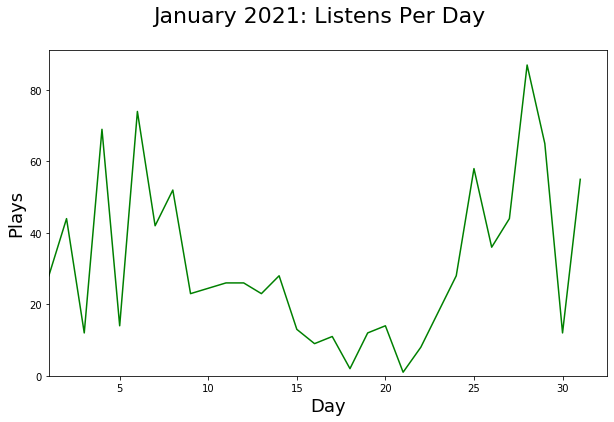

In [9]:
sfy.listensPerDay(sp_df, 1, 2021)

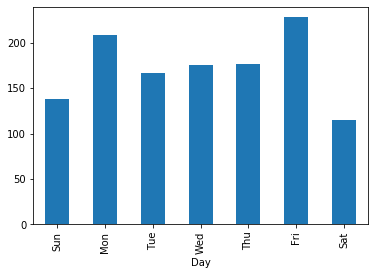

In [11]:
# average per day of week

# bar graph
day_count = sp_df.groupby(['Day']).count()['artistName'].reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
day_count.plot.bar()

# take average?

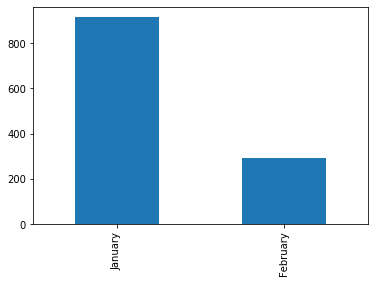

In [12]:
# total per month
day_count = sp_df.groupby(['Month']).count()['artistName']
day_count.index = list(map(lambda x: months[x], day_count.index.tolist()))
day_count.plot.bar()

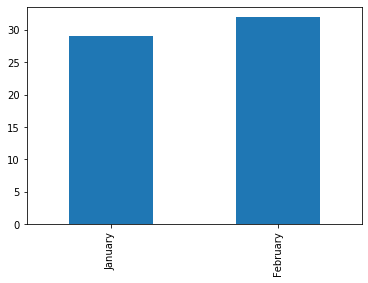

In [13]:
# average per day per month

day_count = sp_df.groupby(['Month']).count()['artistName']

months_dict = {}

for t in pd.unique(list(zip(sp_df['Month'], sp_df['Year']))):
    if t[0] not in months_dict:
        months_dict[t[0]] = 0
    months_dict[t[0]] += monthrange(t[1], t[0])[1]

stt = datetime.datetime.strptime(sp_df.loc[0]['endTime'].split()[0], '%Y-%m-%d')
end = datetime.datetime.strptime(sp_df.loc[len(sp_df)-1]['endTime'].split()[0], '%Y-%m-%d')

# subtract off for start and end
months_dict[stt.month] -= stt.day - 1
months_dict[end.month] -= monthrange(end.year, end.month)[1] - end.day

# get the averages
for key in months_dict.keys():
    day_count[key] /= months_dict[key]
    
day_count.index = list(map(lambda x: months[x], day_count.index.tolist()))
day_count.plot.bar()

In [19]:
# plays/time per day

# total number of days
stt = datetime.datetime.strptime(sp_df.loc[0]['endTime'].split()[0], '%Y-%m-%d')
end = datetime.datetime.strptime(sp_df.loc[len(sp_df)-1]['endTime'].split()[0], '%Y-%m-%d')
# (end-stt).days # total days

# minutes per day
minutes = sp_df['msPlayed'].sum() / 1000 / 60
minutes_per_day = minutes / (end-stt).days
print(minutes_per_day, "minutes per day")

# plays per day
plays_per_day = len(sp_df) / (end-stt).days
print(plays_per_day, "plays per day")

115.54105213675214 minutes per day
31.0 plays per day


In [ ]:
# top artist(s) by day of week


In [ ]:
# top artist and track for each month
